# Fenster Funktionen

Dokumentationen aus Modul scipy.signal 

References
----------

1. Blackman, R.B. and Tukey, J.W., (1958) The measurement of power spectra, Dover Publications, New York.
2. E.R. Kanasewich, "Time Sequence Analysis in Geophysics", The University of Alberta Press, 1975, pp. 109-110.
3. Wikipedia, "Window function", http://en.wikipedia.org/wiki/Window_function
4. W.H. Press,  B.P. Flannery, S.A. Teukolsky, and W.T. Vetterling, "Numerical Recipes", Cambridge University Press, 1986, page 425.

## Hamming window
The Hamming window is defined as

$$w(n) = 0.54 - 0.46 \cos\left(\frac{2\pi{n}}{M-1}\right)
           \qquad 0 \leq n \leq M-1$$

The Hamming was named for R. W. Hamming, an associate of J. W. Tukey and
is described in Blackman and Tukey. It was recommended for smoothing the
truncated autocovariance function in the time domain.
Most references to the Hamming window come from the signal processing
literature, where it is used as one of many windowing functions for
smoothing values.  It is also known as an apodization (which means
"removing the foot", i.e. smoothing discontinuities at the beginning
and end of the sampled signal) or tapering function.



Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


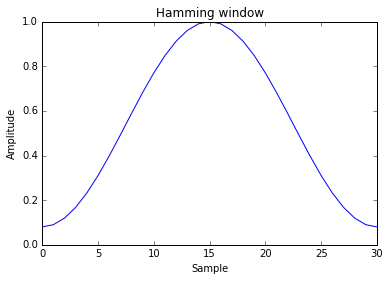

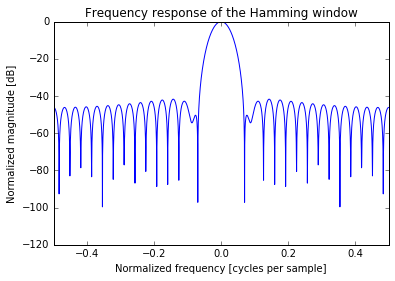

In [12]:
%pylab inline
%config InlineBackend.figure_format = 'svg'

from scipy import signal
from scipy.fftpack import fft, fftshift

def plot_windows_response(window,name):
    figure()
    plot(window)
    title(name+" window")
    ylabel("Amplitude")
    xlabel("Sample")
    figure()
    A = fft(window, 2048) / (len(window)/2.0)
    freq = np.linspace(-0.5, 0.5, len(A))
    response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
    plot(freq, response)
    axis([-0.5, 0.5, -120, 0])
    title("Frequency response of the "+name+" window")
    ylabel("Normalized magnitude [dB]")
    xlabel("Normalized frequency [cycles per sample]")
    
window = signal.hamming(31)
plot_windows_response(window,"Hamming")

# Boxcar

Kein Fenster bzw. Gleichgewichtung aller Werte.

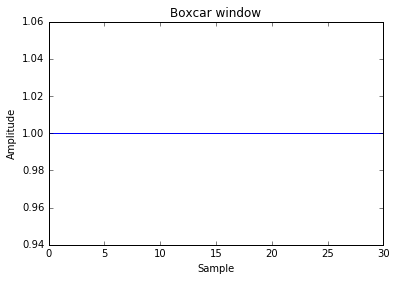

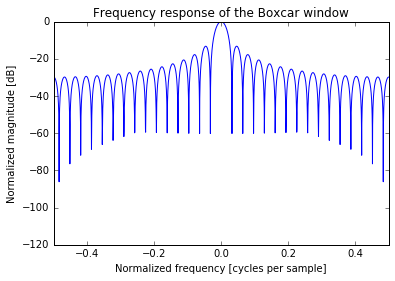

In [13]:
window = signal.boxcar(31)
plot_windows_response(window,"Boxcar")

## Dreieck

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log10


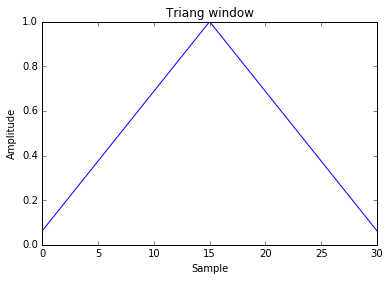

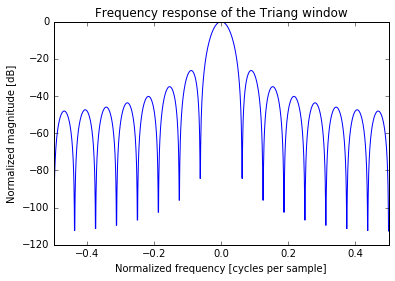

In [50]:
window = signal.triang(31)
plot_windows_response(window,"Triang")

## Hanning

The Hann window is defined as

$$w(n) = 0.5 - 0.5 \cos\left(\frac{2\pi{n}}{M-1}\right)
           \qquad 0 \leq n \leq M-1$$

The window was named for Julius van Hann, an Austrian meterologist. It is
also known as the Cosine Bell. It is sometimes erroneously referred to as
the "Hanning" window, from the use of "hann" as a verb in the original
paper and confusion with the very similar Hamming window.

Most references to the Hann window come from the signal processing
literature, where it is used as one of many windowing functions for
smoothing values.  It is also known as an apodization (which means
"removing the foot", i.e. smoothing discontinuities at the beginning
and end of the sampled signal) or tapering function.

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log10


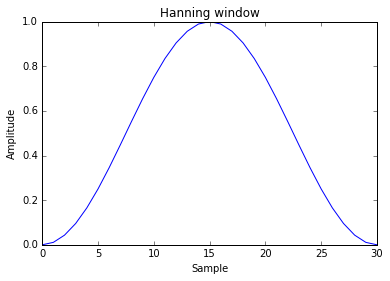

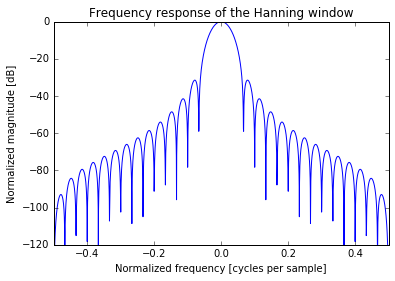

In [21]:
window = signal.hanning(31)
plot_windows_response(window,"Hanning")

## Gauss
The Gaussian window is defined as

$$w(n) = e^{ -\frac{1}{2}\left(\frac{n}{\sigma}\right)^2 }$$



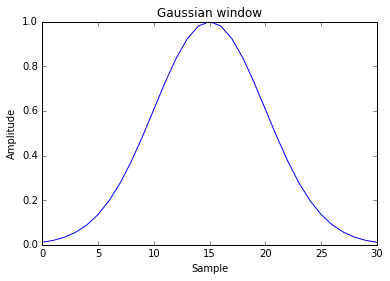

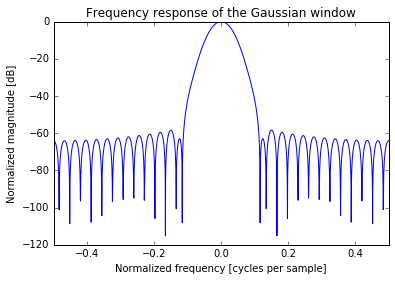

In [25]:
window = signal.gaussian(31,5)
plot_windows_response(window,"Gaussian")

In [ ]:
window = signal.triang(31)
plot_windows_response(window,"Triang")

## Filter Design

Die Koeffizienten für ein einfaches Filter mit endlicher Impulsantwort können mit der Funktion firwin berechnet werden.

https://de.wikipedia.org/wiki/Filter_mit_endlicher_Impulsantwort

### Tiefpass

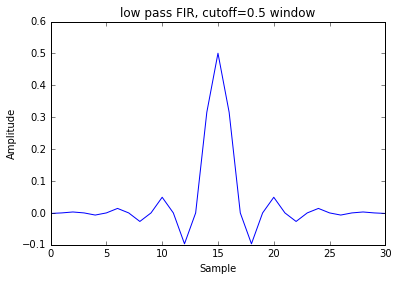

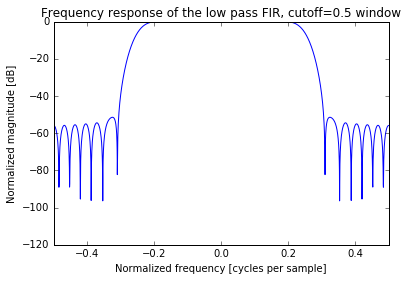

In [55]:
numtaps=31
window=signal.firwin(numtaps,cutoff = 0.5, pass_zero=True)
plot_windows_response(window,"low pass FIR, cutoff=0.5")

### Hochpass

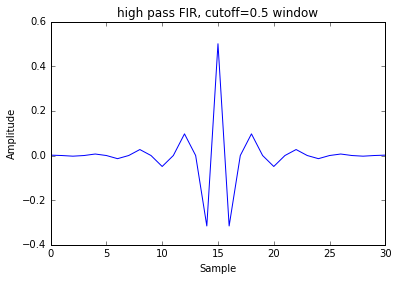

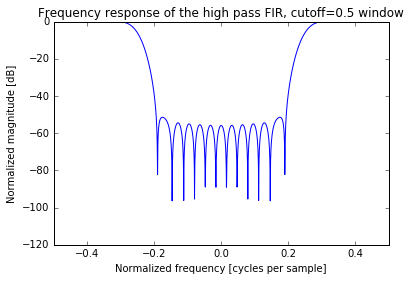

In [63]:
numtaps=31
window=signal.firwin(numtaps,cutoff = 0.5, pass_zero=False)
plot_windows_response(window,"high pass FIR, cutoff=0.5")

### Bandpass

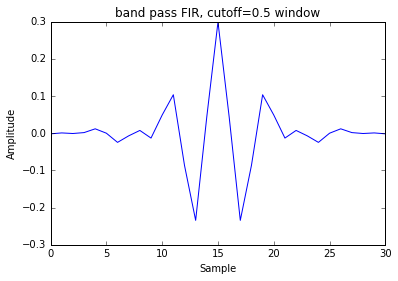

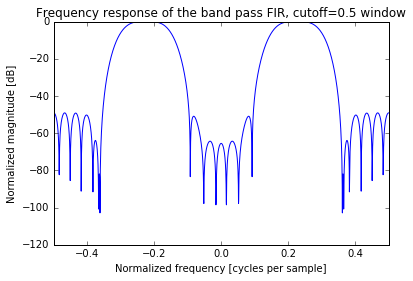

In [64]:
numtaps=31
window=signal.firwin(numtaps,cutoff = [0.3,0.6], pass_zero=False)
plot_windows_response(window,"band pass FIR, cutoff=0.5")